In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
import math

In [20]:
df = pd.read_excel('D:/Programming/Data analytics/static/Week 5/Tensile strength of paper.xlsx')
df.columns

Index(['hardwood concentration 5%', 'hardwood concentration 10%',
       'hardwood concentration 15%', 'hardwood concentration 20%'],
      dtype='object')

In [12]:
fivep = df['hardwood concentration 5%']
tenp = df['hardwood concentration 10%']
fifteenp = df['hardwood concentration 15%']
twentyp = df['hardwood concentration 20%']

In [13]:
box_plot_data = [fivep, tenp, fifteenp, twentyp]

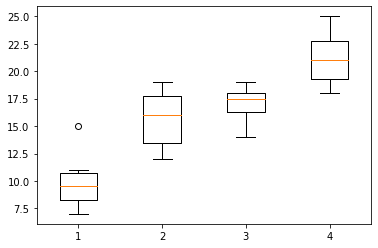

In [14]:
plt.boxplot(box_plot_data)
plt.show()

In [15]:
stats.f_oneway(fivep, tenp, fifteenp, twentyp)

F_onewayResult(statistic=19.605206999573184, pvalue=3.5925782584743027e-06)

In [27]:
data_r1 = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['hardwood concentration 5%', 'hardwood concentration 10%',
       'hardwood concentration 15%', 'hardwood concentration 20%'], var_name = 'Treatments')

In [26]:
# df.reset_index().melt(id_vars=['index'], value_vars=['hardwood concentration 5%', 'hardwood concentration 10%','hardwood concentration 15%', 'hardwood concentration 20%'])

# can also use this instead of the above

In [29]:
model = ols('value ~ C(Treatments)', data = data_r1).fit()

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     19.61
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           3.59e-06
Time:                        16:05:13   Log-Likelihood:                -54.344
No. Observations:                  24   AIC:                             116.7
Df Residuals:                      20   BIC:                             121.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                      15.6667      1.041     15.042      0.000      13.494      17.839
C(Treatments)[T.hardwood concentration 15%]     1.3333      1.473      0.905      0.376      -1.739       4.406
C(Treatments)[T.hardwood concentration 20%]     5.5000      1.473      3.734      0.001       2.428       8.572
C(Treatments)[T.hardwood concentration 5%]     -5.6667      1.473     -3.847      0.001      -8.739      -2.594
==============================================================================
Omnibus:                        0.929   Durbin-Watson:                   2.181
Prob(Omnibus):                  0.628   Jarque-Bera (JB):                0.861
Skew:                           0.248   Prob(JB):                        0.650
Kurtosis:                       2.215   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
anova_table = sm.stats.anova_lm(model, type = 1)

In [32]:
anova_table # we reject it as P value is very small

,df,sum_sq,mean_sq,F,PR(>F)
C(Treatments),3.0,382.791667,127.597222,19.605207,0.000004
Residual,20.0,130.166667,6.508333,NaN,NaN


### Fisher's LSD method

In [37]:
t = -1*stats.t.ppf(0.025, 20)
n = 6
MSE =6.508333
lsd = t*math.sqrt(2*MSE/n)
lsd # If the difference of averages of any two treatment is more than 'lsd' then thwy don't have equal mean

3.072422588325206